# Asteroides Diameter Predictor

## Import Necessary Liberaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

## Import DataSet

In [2]:
dataset = pd.read_csv("Asteroid_Updated.csv")
dataset.head()

,name,a,e,i,om,w,q,ad,per_y,data_arc,...,UB,IR,spec_B,spec_T,G,moid,class,n,per,ma
0,Ceres,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,...,0.426,NaN,C,G,0.12,1.59478,MBA,0.213885,1683.145708,77.372096
1,Pallas,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,...,0.284,NaN,B,B,0.11,1.23324,MBA,0.213503,1686.155999,59.699133
2,Juno,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,...,0.433,NaN,Sk,S,0.32,1.03454,MBA,0.226019,1592.787285,34.925016
3,Vesta,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,...,0.492,NaN,V,V,0.32,1.13948,MBA,0.271609,1325.432765,95.861936
4,Astraea,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,...,0.411,NaN,S,S,NaN,1.09589,MBA,0.238632,1508.600458,282.366289


In [3]:
# Shape of Dataset
print("Number of Rows :-> ", dataset.shape[0])
print("Number of Columns :-> ", dataset.shape[1])

Number of Rows :->  839714
Number of Columns :->  31


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839714 entries, 0 to 839713
Data columns (total 31 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   name            21967 non-null   object 
 1   a               839712 non-null  float64
 2   e               839714 non-null  float64
 3   i               839714 non-null  float64
 4   om              839714 non-null  float64
 5   w               839714 non-null  float64
 6   q               839714 non-null  float64
 7   ad              839708 non-null  float64
 8   per_y           839713 non-null  float64
 9   data_arc        824240 non-null  float64
 10  condition_code  838847 non-null  object 
 11  n_obs_used      839714 non-null  int64  
 12  H               837025 non-null  float64
 13  neo             839708 non-null  object 
 14  pha             823272 non-null  object 
 15  diameter        137636 non-null  object 
 16  extent          18 non-null      object 
 17  albedo    

In [5]:
# Segregate Data into numeric and categorical onces
categorical, numeric = [], []
for ele in dataset.columns:
    if dataset[ele].dtype == 'object':
        categorical.append(ele)
    else:
        numeric.append(ele)
print("Categorical Data : ", categorical)
print("Numeric Data : ", numeric)

Categorical Data :  ['name', 'condition_code', 'neo', 'pha', 'diameter', 'extent', 'spec_B', 'spec_T', 'class']
Numeric Data :  ['a', 'e', 'i', 'om', 'w', 'q', 'ad', 'per_y', 'data_arc', 'n_obs_used', 'H', 'albedo', 'rot_per', 'GM', 'BV', 'UB', 'IR', 'G', 'moid', 'n', 'per', 'ma']


In [6]:
# Converting 'diameter' into float32 data type
dataset['diameter'] = np.float32(dataset['diameter'])

In [7]:
categorical.remove('diameter')

## Handling Missing Values

In [8]:
# All Missing Values
dataset.isnull().sum()

name              817747
a                      2
e                      0
i                      0
om                     0
w                      0
q                      0
ad                     6
per_y                  1
data_arc           15474
condition_code       867
n_obs_used             0
H                   2689
neo                    6
pha                16442
diameter          702078
extent            839696
albedo            703305
rot_per           820918
GM                839700
BV                838693
UB                838735
IR                839713
spec_B            838048
spec_T            838734
G                 839595
moid               16442
class                  0
n                      2
per                    6
ma                     8
dtype: int64

### Treating Numeric Missing Values

In [9]:
# Numeric Missing Values

missing_num = []
for feature in numeric:
    missing = dataset[feature].isnull().sum()
    if missing > 0:
        print(feature, " ---> ", missing)
        missing_num.append(feature)

a  --->  2
ad  --->  6
per_y  --->  1
data_arc  --->  15474
H  --->  2689
albedo  --->  703305
rot_per  --->  820918
GM  --->  839700
BV  --->  838693
UB  --->  838735
IR  --->  839713
G  --->  839595
moid  --->  16442
n  --->  2
per  --->  6
ma  --->  8


In [10]:
# Numeric with more than 90% NaN values 

remove_num = []
max_len = dataset.shape[0]

for ele in numeric:
    null = len(dataset[ele][dataset[ele].isnull()==True])
    not_null = len(dataset[ele][dataset[ele].isnull()==False])

    if null > not_null:
        percentage = null*100//max_len
        if percentage > 90:
            print("Percentage of NaN values for", ele, " : ", null*100//max_len, "%")
            remove_num.append(ele)

Percentage of NaN values for rot_per  :  97 %
Percentage of NaN values for GM  :  99 %
Percentage of NaN values for BV  :  99 %
Percentage of NaN values for UB  :  99 %
Percentage of NaN values for IR  :  99 %
Percentage of NaN values for G  :  99 %


In [11]:
dataset.drop(remove_num, axis=1,inplace=True)

In [12]:
remain_miss_num = [x for x in missing_num if x not in remove_num]
print("Remaining Row with Missing Values ", remain_miss_num)

Remaining Row with Missing Values  ['a', 'ad', 'per_y', 'data_arc', 'H', 'albedo', 'moid', 'n', 'per', 'ma']


In [13]:
def fill_na(feature):
    mean = dataset[feature].mean()
    dataset[feature].fillna(mean, inplace=True)

In [14]:
# Filling the remaining missing values with Mean
for ele in remain_miss_num:
    fill_na(ele)

In [15]:
dataset.columns

Index(['name', 'a', 'e', 'i', 'om', 'w', 'q', 'ad', 'per_y', 'data_arc',
       'condition_code', 'n_obs_used', 'H', 'neo', 'pha', 'diameter', 'extent',
       'albedo', 'spec_B', 'spec_T', 'moid', 'class', 'n', 'per', 'ma'],
      dtype='object')

### Treating Categorical Missing Values

In [16]:
categorical

['name', 'condition_code', 'neo', 'pha', 'extent', 'spec_B', 'spec_T', 'class']

In [17]:
# Categorical Missing Values
for feature in categorical:
    missing = dataset[feature].isnull().sum()
    if missing > 0:
        print(feature, " ---> ", missing)

name  --->  817747
condition_code  --->  867
neo  --->  6
pha  --->  16442
extent  --->  839696
spec_B  --->  838048
spec_T  --->  838734


In [18]:
dataset['condition_code'].value_counts()

0      540392
0       95711
9       23942
1       22193
5       19766
6       17103
7       15556
8       15474
4       15173
2       14541
1       10568
3        9430
9.0      7224
6.0      5804
2        5563
5        5336
7.0      4946
8.0      4347
3        3133
4        2490
E         154
D           1
Name: condition_code, dtype: int64

#### Some values are string and some are float and some numbers are in string formate so It seems to be that data is corrupted due to severe changes in data type and its occurances. So this column need to be droped  

In [19]:
dataset.drop('condition_code', axis=1, inplace=True)
categorical.remove('condition_code')

In [20]:
# Categories with more then 90% NaN values

remove_cat = []
max_len = dataset.shape[0]

for ele in categorical:
    null = len(dataset[ele][dataset[ele].isnull()==True])
    not_null = len(dataset[ele][dataset[ele].isnull()==False])

    if null > not_null:
        percentage = null*100//max_len
        if percentage > 90:
            print("Percentage of NaN values for", ele, " : ", null*100//max_len, "%")
            remove_cat.append(ele)


Percentage of NaN values for name  :  97 %
Percentage of NaN values for extent  :  99 %
Percentage of NaN values for spec_B  :  99 %
Percentage of NaN values for spec_T  :  99 %


In [21]:
dataset.drop(remove_cat, axis=1, inplace=True)

In [22]:
# Filling the remaining columns with mode.
dataset['neo'].fillna(dataset['neo'].mode()[0], inplace=True)
dataset['pha'].fillna(dataset['pha'].mode()[0], inplace=True)
dataset['class'].fillna(dataset['class'].mode()[0], inplace=True)

In [23]:
dataset.isnull().sum()

a                  0
e                  0
i                  0
om                 0
w                  0
q                  0
ad                 0
per_y              0
data_arc           0
n_obs_used         0
H                  0
neo                0
pha                0
diameter      702078
albedo             0
moid               0
class              0
n                  0
per                0
ma                 0
dtype: int64

In [24]:
# Filling 'diameter' column with mean.
dataset['diameter'].fillna(dataset['diameter'].mean(), inplace=True)

## Outliers in 'diameter'

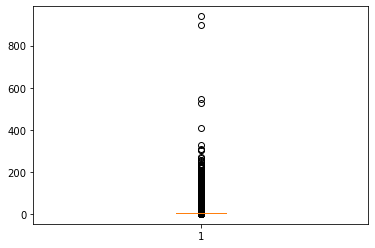

In [25]:
plt.boxplot(dataset['diameter'])
plt.show()

In [26]:
print("Number of rows with diameter greater than 7 : ",len(dataset[dataset['diameter']>7]))

Number of rows with diameter greater than 7 :  21935


In [27]:
print("Number of rows with diameter greater than 8 : ",len(dataset[dataset['diameter']>8]))

Number of rows with diameter greater than 8 :  16156


#### Number of rows with diameter greater than 8 is very less as compare to size of dataset so considering data with 'diameter' less than 8

In [28]:
dataset = dataset[dataset['diameter']<8]

## Converting categorical data into numeric

In [29]:
dataset['neo'].value_counts()

N    802162
Y     21394
Name: neo, dtype: int64

In [30]:
dataset['pha'].value_counts()

N    821541
Y      2015
Name: pha, dtype: int64

In [31]:
dataset['class'].value_counts()

MBA    735512
OMB     22415
IMB     17541
MCA     17340
APO     11758
AMO      8015
TJN      5523
TNO      3299
ATE      1601
CEN       447
AST        79
IEO        20
HYA         4
PAA         2
Name: class, dtype: int64

In [32]:
# Label Encoding the categorical features 'neo' and 'pha' due to severe imbalanced data
from sklearn.preprocessing import LabelEncoder
lb_encode = LabelEncoder()
dataset['neo'] = lb_encode.fit_transform(dataset['neo'])
dataset['pha'] = lb_encode.fit_transform(dataset['pha'])

In [33]:
# Treating categorical feature 'class' with dummy variables trap
class_dummy = pd.get_dummies(dataset['class'], drop_first=True)
class_dummy.head()

,APO,AST,ATE,CEN,HYA,IEO,IMB,MBA,MCA,OMB,PAA,TJN,TNO
314,0,0,0,0,0,0,0,1,0,0,0,0,0
648,0,0,0,0,0,0,0,1,0,0,0,0,0
681,0,0,0,0,0,0,0,1,0,0,0,0,0
698,0,0,0,0,0,0,0,0,1,0,0,0,0
702,0,0,0,0,0,0,0,1,0,0,0,0,0


In [34]:
# Combining both datasets
dataset = pd.concat([dataset, class_dummy], axis=1)
dataset.drop('class', axis = 1, inplace=True)

In [35]:
# Saving the cleaned numeric dataset
dataset.to_csv("Clean_Num_data.csv")

In [36]:
# Seprating target feature from dataset
dataset, target = dataset.drop('diameter', axis=1), dataset['diameter']

In [37]:
# Converting dataset of data type float64 to float32
ndataset = np.float32(dataset)

## Split Data set into Training and test set

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ndataset, target, test_size = 0.2, random_state = 0)

## Scaling the data

In [39]:
from sklearn.preprocessing import StandardScaler
sc_scale = StandardScaler()
X_train = sc_scale.fit_transform(X_train)
X_test = sc_scale.transform(X_test)

## Evaluation 

In [40]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

In [41]:
def evaluate(y_pred, y_actual):
    mae = round(mean_absolute_error(y_actual, y_pred), 4)
    mse = round(mean_squared_error(y_actual, y_pred), 4)
    rmse = round(sqrt(mse), 4)
    r2 = round(r2_score(y_actual, y_pred), 4)

    print("Mean Absolute Error :-> ", mae)
    print("Mean Squared Error :-> ", mse)
    print("Root Mean Squared Error :-> ", rmse)
    print("R-Square :-> ", r2)

    return mae, mse, rmse, r2

## Applying Algorithms

In [42]:
algo_score = {}     # For Storing Algoriths name and its performance

### CatBoost Regressor

In [43]:
from catboost import CatBoostRegressor
cbr = CatBoostRegressor(loss_function='RMSE', iterations=1000)
cbr.fit(X_train, y_train)

Learning rate set to 0.114169
0:	learn: 0.7574489	total: 221ms	remaining: 3m 40s
1:	learn: 0.6873353	total: 278ms	remaining: 2m 18s
2:	learn: 0.6258838	total: 334ms	remaining: 1m 50s
3:	learn: 0.5714819	total: 388ms	remaining: 1m 36s
4:	learn: 0.5235177	total: 444ms	remaining: 1m 28s
5:	learn: 0.4823801	total: 501ms	remaining: 1m 23s
6:	learn: 0.4471151	total: 553ms	remaining: 1m 18s
7:	learn: 0.4157595	total: 602ms	remaining: 1m 14s
8:	learn: 0.3881428	total: 653ms	remaining: 1m 11s
9:	learn: 0.3645245	total: 703ms	remaining: 1m 9s
10:	learn: 0.3437910	total: 753ms	remaining: 1m 7s
11:	learn: 0.3267239	total: 801ms	remaining: 1m 5s
12:	learn: 0.3111830	total: 849ms	remaining: 1m 4s
13:	learn: 0.2977348	total: 901ms	remaining: 1m 3s
14:	learn: 0.2857934	total: 951ms	remaining: 1m 2s
15:	learn: 0.2752796	total: 1s	remaining: 1m 1s
16:	learn: 0.2668233	total: 1.06s	remaining: 1m 1s
17:	learn: 0.2590552	total: 1.11s	remaining: 1m
18:	learn: 0.2522546	total: 1.16s	remaining: 60s
19:	learn:

In [44]:
y_pred_cat = cbr.predict(X_test)
mae, mse, rmse, r2 = evaluate(y_test, y_pred_cat)

Mean Absolute Error :->  0.0463
Mean Squared Error :->  0.029
Root Mean Squared Error :->  0.1703
R-Square :->  0.9572


In [45]:
algo_score['CatBoost'] = r2

### RandomForest Regressor

In [46]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)

RandomForestRegressor()

In [47]:
y_pred_rf = rf_reg.predict(X_test)
mae, mse, rmse, r2 = evaluate(y_test, y_pred_rf)

Mean Absolute Error :->  0.0446
Mean Squared Error :->  0.0306
Root Mean Squared Error :->  0.1749
R-Square :->  0.9548


In [48]:
algo_score['Random Forest'] = r2

### K Nearest Neighbour Regressor

In [49]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=4)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=4)

In [50]:
y_pred_knn = knn.predict(X_test)
mae, mse, rmse, r2 = evaluate(y_test, y_pred_knn)

Mean Absolute Error :->  0.1018
Mean Squared Error :->  0.1382
Root Mean Squared Error :->  0.3718
R-Square :->  0.7567


In [51]:
algo_score['K Nearest Neighbour'] = r2

### Decision Tree Regressor

In [55]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [56]:
y_pred_tree = tree.predict(X_test)
mae, mse, rmse, r2 = evaluate(y_test, y_pred_tree)

Mean Absolute Error :->  0.0606
Mean Squared Error :->  0.062
Root Mean Squared Error :->  0.249
R-Square :->  0.9123


In [57]:
algo_score['Decision Tree'] = r2

### XGBoost Regressor

In [58]:
from xgboost import XGBRegressor
xgb_r = XGBRegressor()
xgb_r.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [59]:
y_pred_xgb = xgb_r.predict(X_test)
mae, mse, rmse, r2 = evaluate(y_test, y_pred_xgb)

Mean Absolute Error :->  0.0458
Mean Squared Error :->  0.0299
Root Mean Squared Error :->  0.1729
R-Square :->  0.9558


In [60]:
algo_score['XG Boost'] = r2

### Artificial Neural Network

In [61]:
from keras.models import Sequential
from keras.layers import Dense

In [70]:
ann = Sequential()
ann.add(Dense(input_dim=X_train.shape[1], units=8, kernel_initializer="he_uniform", activation="relu"))
ann.add(Dense(units=5, kernel_initializer="he_uniform", activation="relu"))
ann.add(Dense(units=1, activation='relu'))

In [71]:
ann.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 8)                 256       
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 45        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 6         
Total params: 307
Trainable params: 307
Non-trainable params: 0
_________________________________________________________________


In [72]:
ann.compile(optimizer='adam', loss='mean_squared_error')
ann_r = ann.fit(X_train, y_train, validation_split=0.3, epochs=5, batch_size=200)

Epoch 1/5
2306/2306 [==============================] - 6s 3ms/step - loss: 2.5075 - val_loss: 0.2957
Epoch 2/5
2306/2306 [==============================] - 5s 2ms/step - loss: 0.2214 - val_loss: 0.1747
Epoch 3/5
2306/2306 [==============================] - 5s 2ms/step - loss: 0.1435 - val_loss: 0.1194
Epoch 4/5
2306/2306 [==============================] - 4s 2ms/step - loss: 0.1021 - val_loss: 0.0932
Epoch 5/5
2306/2306 [==============================] - 4s 2ms/step - loss: 0.0861 - val_loss: 0.0830


In [73]:
y_pred_ann = ann.predict(X_test)
mae, mse, rmse, r2 = evaluate(y_test, y_pred_ann)

Mean Absolute Error :->  0.1074
Mean Squared Error :->  0.0823
Root Mean Squared Error :->  0.2869
R-Square :->  0.8686


In [74]:
algo_score['ANN'] = r2

## Accuracy of Algorithms

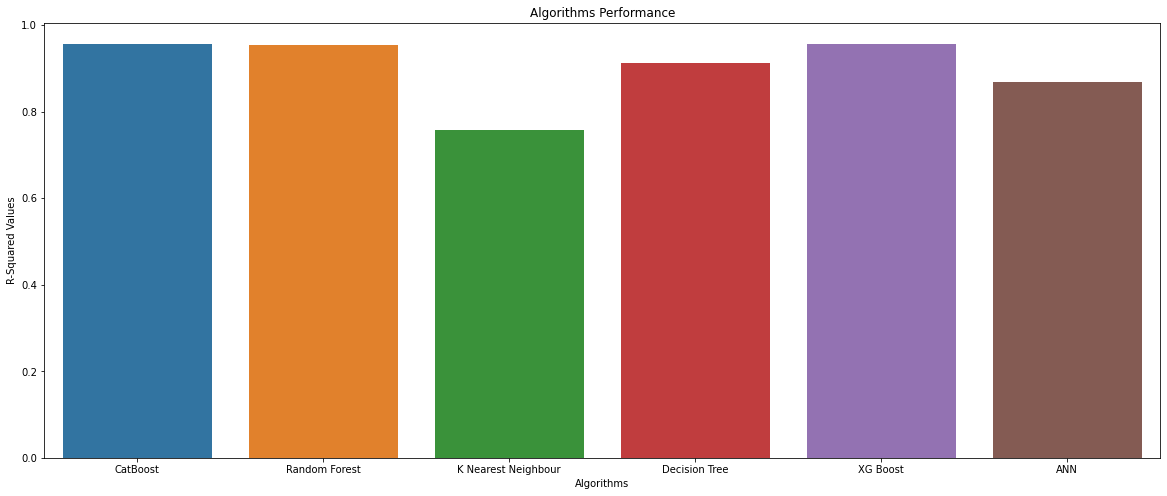

In [76]:
plt.figure(figsize=(20,8))
sns.barplot(x=list(algo_score.keys()), y=list(algo_score.values()))
plt.title("Algorithms Performance")
plt.xlabel("Algorithms")
plt.ylabel("R-Squared Values")
plt.show()

In [77]:
for key, val in algo_score.items():
    print(key, '--->', val)

CatBoost ---> 0.9572
Random Forest ---> 0.9548
K Nearest Neighbour ---> 0.7567
Decision Tree ---> 0.9123
XG Boost ---> 0.9558
ANN ---> 0.8686


In [78]:
maxi = 0
best_algo = ""
for key, val in algo_score.items():
    if val > maxi:
        maxi = val
        best_algo = key
print("Best Performing Algorithm is :-> ", best_algo)
print("R-Squared :-> ", maxi)

Best Performing Algorithm is :->  CatBoost
R-Squared :->  0.9572


# Best performing Model is CatBoost Regressor